# Práctica 2: Programación GPU y Computación Cuántica

María Barroso Honrubia

Gloria del Valle Cano

## Parte 1: Tutorial




### Introducción

Primero comprobamos las características que nos ofrece Google Colab con $\texttt{lscpu}$:

In [1]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

Comprobamos la memoria física disponible y swap del sistema con $\texttt{free}$:

In [2]:
!free -kh

              total        used        free      shared  buff/cache   available
Mem:            12G        572M        9.9G        1.2M        2.2G         11G
Swap:            0B          0B          0B


Observamos con más profundidad información del sistema como memoria total RAM, memoria usada para la caché o número total de swaps:


In [3]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:        10361308 kB
MemAvailable:   12449604 kB
Buffers:          131244 kB
Cached:          2080512 kB
SwapCached:            0 kB
Active:          1059708 kB
Inactive:        1599484 kB
Active(anon):     400672 kB
Inactive(anon):      440 kB
Active(file):     659036 kB
Inactive(file):  1599044 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               940 kB
Writeback:             0 kB
AnonPages:        447444 kB
Mapped:           239832 kB
Shmem:              1188 kB
KReclaimable:     143384 kB
Slab:             193976 kB
SReclaimable:     143384 kB
SUnreclaim:        50592 kB
KernelStack:        4796 kB
PageTables:         6180 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3114684 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       44772 kB
VmallocChunk:          0 kB
Percpu:          

Observamos el funcionamiento de diferentes comandos útiles:

Listar el contenido:

In [4]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Nov  1 13:35 .
drwxr-xr-x 1 root root 4096 Nov  7 13:42 ..
drwxr-xr-x 4 root root 4096 Nov  1 13:34 .config
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data


Vemos el contenido del directorio /usr/local  donde está instalado CUDA:

In [5]:
!ls -la /usr/local

total 84
drwxr-xr-x  1 root root 4096 Nov  1 13:57 .
drwxr-xr-x  1 root root 4096 Nov  7 13:42 ..
drwxr-xr-x  1 root root 4096 Nov  4 13:12 bin
lrwxrwxrwx  1 root root   22 Nov  1 13:27 cuda -> /etc/alternatives/cuda
drwxr-xr-x 16 root root 4096 Nov  1 13:19 cuda-10.0
drwxr-xr-x 15 root root 4096 Nov  1 13:21 cuda-10.1
lrwxrwxrwx  1 root root   25 Nov  1 13:27 cuda-11 -> /etc/alternatives/cuda-11
drwxr-xr-x 15 root root 4096 Nov  1 13:24 cuda-11.0
drwxr-xr-x  1 root root 4096 Nov  1 13:26 cuda-11.1
drwxr-xr-x  1 root root 4096 Nov  1 13:36 etc
drwxr-xr-x  2 root root 4096 Nov 19  2020 games
drwxr-xr-x  2 root root 4096 Nov  1 13:47 _gcs_config_ops.so
drwxr-xr-x  1 root root 4096 Nov  1 13:57 include
drwxr-xr-x  1 root root 4096 Nov  1 13:58 lib
-rw-r--r--  1 root root 1636 Nov  1 13:52 LICENSE.txt
drwxr-xr-x  3 root root 4096 Nov  1 13:47 licensing
lrwxrwxrwx  1 root root    9 Nov 19  2020 man -> share/man
drwxr-xr-x  2 root root 4096 Nov 19  2020 sbin
-rw-r--r--  1 root root 7291 Nov 

In [6]:
!ls -la /usr/local/cuda-11.1/bin

total 80220
drwxr-xr-x 1 root root     4096 Nov  1 13:26 .
drwxr-xr-x 1 root root     4096 Nov  1 13:26 ..
-rwxr-xr-x 1 root root    80608 Oct 13  2020 bin2c
lrwxrwxrwx 1 root root        4 Oct 13  2020 computeprof -> nvvp
-rwxr-xr-x 1 root root       97 Oct 13  2020 compute-sanitizer
drwxr-xr-x 2 root root     4096 Dec 14  2020 crt
-rwxr-xr-x 1 root root  5190640 Oct 13  2020 cudafe++
-rwxr-xr-x 1 root root 12035840 Oct 13  2020 cuda-gdb
-rwxr-xr-x 1 root root   753776 Oct 13  2020 cuda-gdbserver
-rwxr-xr-x 1 root root      800 Oct 13  2020 cuda-install-samples-11.1.sh
-rwxr-xr-x 1 root root   353752 Oct 13  2020 cuda-memcheck
-rwxr-xr-x 1 root root   232752 Sep 16  2020 cuobjdump
-rwxr-xr-x 1 root root   269392 Oct 13  2020 fatbinary
-rwxr-xr-x 1 root root     2974 Oct 16  2020 ncu
-rwxr-xr-x 1 root root     2577 Oct 16  2020 ncu-ui
-rwxr-xr-x 1 root root     1580 Oct 13  2020 nsight_ee_plugins_manage.sh
-rwxr-xr-x 1 root root      745 Oct 16  2020 nsight-sys
-rwxr-xr-x 1 root root  

In [7]:
!ls -la /usr/local/cuda-11.1/samples


total 108
drwxr-xr-x 11 root root  4096 Nov  1 13:26 .
drwxr-xr-x  1 root root  4096 Nov  1 13:26 ..
drwxr-xr-x 63 root root  4096 Nov  1 13:26 0_Simple
drwxr-xr-x  8 root root  4096 Nov  1 13:26 1_Utilities
drwxr-xr-x 14 root root  4096 Nov  1 13:26 2_Graphics
drwxr-xr-x 24 root root  4096 Nov  1 13:26 3_Imaging
drwxr-xr-x 10 root root  4096 Nov  1 13:26 4_Finance
drwxr-xr-x 10 root root  4096 Nov  1 13:26 5_Simulations
drwxr-xr-x 36 root root  4096 Nov  1 13:26 6_Advanced
drwxr-xr-x 37 root root  4096 Nov  1 13:26 7_CUDALibraries
drwxr-xr-x  6 root root  4096 Nov  1 13:26 common
-rw-r--r--  1 root root 60537 Oct 13  2020 EULA.txt
-rw-r--r--  1 root root  2606 Oct 13  2020 Makefile


Observamos la versión de CUDA instalada:

In [8]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


Con la interfaz de configuración de NVIDIA observamos el estado de la GPU:

In [9]:
!nvidia-smi

Sun Nov  7 13:51:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Listamos los ejemplos proporcionados para el tutorial:



In [10]:
!ls -la /usr/local/cuda/samples/

total 108
drwxr-xr-x 11 root root  4096 Nov  1 13:26 .
drwxr-xr-x  1 root root  4096 Nov  1 13:26 ..
drwxr-xr-x 63 root root  4096 Nov  1 13:26 0_Simple
drwxr-xr-x  8 root root  4096 Nov  1 13:26 1_Utilities
drwxr-xr-x 14 root root  4096 Nov  1 13:26 2_Graphics
drwxr-xr-x 24 root root  4096 Nov  1 13:26 3_Imaging
drwxr-xr-x 10 root root  4096 Nov  1 13:26 4_Finance
drwxr-xr-x 10 root root  4096 Nov  1 13:26 5_Simulations
drwxr-xr-x 36 root root  4096 Nov  1 13:26 6_Advanced
drwxr-xr-x 37 root root  4096 Nov  1 13:26 7_CUDALibraries
drwxr-xr-x  6 root root  4096 Nov  1 13:26 common
-rw-r--r--  1 root root 60537 Oct 13  2020 EULA.txt
-rw-r--r--  1 root root  2606 Oct 13  2020 Makefile


Compilación de uno de los ejemplos proporcionados:

In [11]:
%cd /usr/local/cuda/samples/1_Utilities/deviceQuery/
%ls

/usr/local/cuda-11.1/samples/1_Utilities/deviceQuery
deviceQuery.cpp  Makefile  NsightEclipse.xml  readme.txt


In [12]:
!make

/usr/local/cuda-11.1/bin/nvcc -ccbin g++ -I../../common/inc  -m64    -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_80,code=sm_80 -gencode arch=compute_86,code=sm_86 -gencode arch=compute_86,code=compute_86 -o deviceQuery.o -c deviceQuery.cpp
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
/usr/local/cuda-11.1/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode ar

In [13]:
!ls -la

total 776
drwxr-xr-x 1 root root   4096 Nov  7 13:52 .
drwxr-xr-x 1 root root   4096 Nov  1 13:26 ..
-rwxr-xr-x 1 root root 722704 Nov  7 13:52 deviceQuery
-rw-r--r-- 1 root root  12720 Oct 13  2020 deviceQuery.cpp
-rw-r--r-- 1 root root  16752 Nov  7 13:52 deviceQuery.o
-rw-r--r-- 1 root root  12165 Oct 13  2020 Makefile
-rw-r--r-- 1 root root   1815 Oct 13  2020 NsightEclipse.xml
-rw-r--r-- 1 root root    168 Oct 13  2020 readme.txt


Corremos el ejecutable que nos ofrece información relevante acerca de CUDA.

In [14]:
!./deviceQuery

./deviceQuery Starting...

 CUDA Device Query (Runtime API) version (CUDART static linking)

Detected 1 CUDA Capable device(s)

Device 0: "Tesla K80"
  CUDA Driver Version / Runtime Version          11.2 / 11.1
  CUDA Capability Major/Minor version number:    3.7
  Total amount of global memory:                 11441 MBytes (11996954624 bytes)
  (13) Multiprocessors, (192) CUDA Cores/MP:     2496 CUDA Cores
  GPU Max Clock rate:                            824 MHz (0.82 GHz)
  Memory Clock rate:                             2505 Mhz
  Memory Bus Width:                              384-bit
  L2 Cache Size:                                 1572864 bytes
  Maximum Texture Dimension Size (x,y,z)         1D=(65536), 2D=(65536, 65536), 3D=(4096, 4096, 4096)
  Maximum Layered 1D Texture Size, (num) layers  1D=(16384), 2048 layers
  Maximum Layered 2D Texture Size, (num) layers  2D=(16384, 16384), 2048 layers
  Total amount of constant memory:               65536 bytes
  Total amount of shared me

Aprovechamos los resultados para responder a las preguntas que se nos ofrecen más abajo:
* **Pruebe a lanzar diferente número de threads (con un solo 1 bloque)
¿Cuáles son los valores máximos y mínimos de número de threads por bloque en esta GPU?**

    Además de verlo en las posteriores ejecuciones, podemos ver ya que por definición el mínimo es 1 thread y como máximo se pueden tener 1024 threads por cada bloque.

* **Pruebe a lanzar diferente número de bloques (con un solo thread) ¿Cuáles son los valores máximos y mínimos de número de bloques en esta GPU?**

    En este caso el máximo número de bloques es 65535, siendo 1 el mínimo. Si se desea ver más información ver [especificaciones técnicas de CUDA](http://blog.cuvilib.com/2010/06/09/nvidia-cuda-difference-between-fermi-and-previous-architectures/)



Compilar en CUDA

In [15]:
%cd /content/

/content


In [16]:
%ls

sample_data/


Hacer un directorio de trabajo

In [17]:
!mkdir workcuda

In [18]:
cd workcuda/


/content/workcuda


In [19]:
!pwd

/content/workcuda


### Ejercicio 1: suma de vectores
A continuación se discuten diferentes versiones de un programa que suma los elementos de un vector en CUDA.

#### Ejercicio base en CUDA: 1 bloque/1 thread
Nota: este ejercicio aportado no aprovecha los recursos de la GPU, es decir, se ejecuta en GPU pero en serie.

In [20]:
%%writefile suma1d.cu

#include <stdio.h>
#include <stdlib.h>

__global__ void add(int *a, int *b, int *c) {
*c = *a + *b;
}

int main() {
int a, b, c;

// host copies of variables a, b & c
int *d_a, *d_b, *d_c;
// device copies of variables a, b & c
int size = sizeof(int);

// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);

// Setup input values  
c = 0;
a = 3;
b = 5;

// Copy inputs to device
cudaMemcpy(d_a, &a, size, cudaMemcpyHostToDevice);
cudaMemcpy(d_b, &b, size, cudaMemcpyHostToDevice);

// Launch add() kernel on GPU
add<<<1,1>>>(d_a, d_b, d_c);

// Copy result back to host
cudaError err = cudaMemcpy(&c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf("result is %d\n",c);

// Cleanup
cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);

return 0;
}

Writing suma1d.cu


Compilamos y ejecutamos el ejemplo

In [21]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma1d.cu -o suma1d -lcudadevrt
!./suma1d

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
result is 8


Comprobamos el perfil de ejecución

Vemos que el resultado es correcto, pero estamos haciendo un mal uso de la GPU al no estar haciendo ninguna división. Por consiguiente esto puede afectar al tiempo de ejecución, que se puede ver fácilmente con el $\texttt{profiler}$:

In [22]:
!nvprof ./suma1d

==351== NVPROF is profiling process 351, command: ./suma1d
==351== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
result is 8
==351== Profiling application: ./suma1d
==351== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   38.56%  3.9360us         2  1.9680us  1.5680us  2.3680us  [CUDA memcpy HtoD]
                   36.36%  3.7120us         1  3.7120us  3.7120us  3.7120us  add(int*, int*, int*)
                   25.08%  2.5600us         1  2.5600us  2.5600us  2.5600us  [CUDA memcpy DtoH]
      API calls:   99.59%  259.42ms         3  86.473ms  2.7710us  259.41ms  cudaMalloc
                    0.21%  550.84us         1  550.84us  550.84us  550.84us  cuDeviceTotalMem
                    0.09%  222.48us       101  2.2020us     152ns  78.051us  cuDeviceGetAttribute
                    0.06%  150.04us         3  50.014us  6.0570us  128.40us  cudaFree
                    0.02%  62.940us 

#### Ejercicio N bloques/1 thread
Probamos haciendo paralelismo de 512 bloques de 1 thread.

In [23]:
%%writefile suma2dvector.cu

#include <stdio.h>
#include <stdlib.h>

__global__ void add(int *a, int *b, int *c) {
//*c = *a + *b;
c[blockIdx.x] = a[blockIdx.x] + b[blockIdx.x]; 
}

#define N 512

int main(void) {
int *a, *b, *c;        // host copies of variables a, b & c
int *d_a, *d_b, *d_c;  // device copies of variables a, b & c
int size = N * sizeof(int);

// Allocate space for host copies of a, b, c   Setup input values  
a =  (int *) malloc(size); 
b =  (int *) malloc(size); 
c =  (int *) malloc(size); 


// Setup input values  

for( int i = 0; i < N; i++ )
	{
		a[i] = i;
    b[i] = N-i;
		c[i] = 0;
	}


// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);


// Copy inputs to device
cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

// Launch add() kernel on GPU  Se lanzan N bloques de 1 Thread.
add<<<N,1>>>(d_a, d_b, d_c);

// Copy result back to host
cudaError err = cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf(" valor a[0] es %d\n",a[0]);
printf(" valor b[0] es %d\n",b[0]);
printf("resultado c[0] es %d\n",c[0]);
printf(" valor a[2] es %d\n",a[2]);
printf(" valor b[2] es %d\n",b[2]);
printf("resultado c[2] es %d\n",c[2]);
printf(" valor a[15] es %d\n",a[15]);
printf(" valor b[15] es %d\n",b[15]);
printf("resultado c[15] es %d\n",c[15]);

// Cleanup

free(a); free(b);free(c); 

cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);

return 0;
}

Writing suma2dvector.cu


Compilamos y ejecutamos y vemos que el resultado es correcto.

In [24]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma2dvector.cu -o suma2dvector -lcudadevrt
!./suma2dvector

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
 valor a[0] es 0
 valor b[0] es 512
resultado c[0] es 512
 valor a[2] es 2
 valor b[2] es 510
resultado c[2] es 512
 valor a[15] es 15
 valor b[15] es 497
resultado c[15] es 512


Comprobamos el perfil de ejecución y vemos que tarda más que en el caso anterior. Si bien al haber solo un thread por bloque, quiere decir que solo se ejecuta un warp por bloque y no maximiza el aprovechamiento de la GPU.

In [25]:
!nvprof ./suma2dvector

==398== NVPROF is profiling process 398, command: ./suma2dvector
==398== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
 valor a[0] es 0
 valor b[0] es 512
resultado c[0] es 512
 valor a[2] es 2
 valor b[2] es 510
resultado c[2] es 512
 valor a[15] es 15
 valor b[15] es 497
resultado c[15] es 512
==398== Profiling application: ./suma2dvector
==398== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   41.19%  5.0880us         1  5.0880us  5.0880us  5.0880us  add(int*, int*, int*)
                   37.31%  4.6080us         2  2.3040us  1.9840us  2.6240us  [CUDA memcpy HtoD]
                   21.50%  2.6560us         1  2.6560us  2.6560us  2.6560us  [CUDA memcpy DtoH]
      API calls:   99.55%  201.47ms         3  67.156ms  2.5850us  201.46ms  cudaMalloc
                    0.22%  450.62us         1  450.62us  450.62us  450.62us  cuDeviceTotalMem
                    0.08%  163.84us       

#### Ejercicio N bloques/1 thread
Probamos haciendo paralelismo de 1 bloque de 1024 threads.

Nota: en el tutorial se determinaba N como 1028, sin embargo esto supera el máximo número de threads permitidos por bloque, por lo que el resultado es incorrecto, con el fin de comparar los resultados con diferentes opciones, determinamos N como 1024 threads para este caso.

In [26]:
%%writefile suma2dvectorNthreads.cu

#include <stdio.h>
#include <stdlib.h>

__global__ void add(int *a, int *b, int *c) {
c[threadIdx.x] = a[threadIdx.x] + b[threadIdx.x]; 
}

#define N 1024

int main(void) {
int *a, *b, *c;        // host copies of variables a, b & c
int *d_a, *d_b, *d_c;  // device copies of variables a, b & c
int size = N * sizeof(int);

// Allocate space for host copies of a, b, c   Setup input values  
a =  (int *) malloc(size); 
b =  (int *) malloc(size); 
c =  (int *) malloc(size); 


// Setup input values  

for( int i = 0; i < N; i++ )
	{
		a[i] = i;
    b[i] = N-i;
		c[i] = 0;
	}


// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);


// Copy inputs to device
cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

// Launch add() kernel on GPU  Se lanzan 1 bloques de N Threads.
add<<<1,N>>>(d_a, d_b, d_c);

// Copy result back to host
cudaError err = cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf(" valor a[10] es %d\n",a[10]);
printf(" valor b[10] es %d\n",b[10]);
printf("resultado c[10] es %d\n",c[10]);
printf(" valor a[0] es %d\n",a[0]);
printf(" valor b[0] es %d\n",b[0]);
printf("resultado c[0] es %d\n",c[0]);
printf(" valor a[15] es %d\n",a[15]);
printf(" valor b[15] es %d\n",b[15]);
printf("resultado c[15] es %d\n",c[15]);

// Cleanup

free(a); free(b);free(c); 

cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);

return 0;
}

Writing suma2dvectorNthreads.cu


Ejecutamos este ejemplo y vemos que nuevamente el resultado es correcto.



In [27]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma2dvectorNthreads.cu -o suma2dvectorNthreads -lcudadevrt
!./suma2dvectorNthreads

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
 valor a[10] es 10
 valor b[10] es 1014
resultado c[10] es 1024
 valor a[0] es 0
 valor b[0] es 1024
resultado c[0] es 1024
 valor a[15] es 15
 valor b[15] es 1009
resultado c[15] es 1024


En este caso vemos que la suma tarda bastante y tampoco se aprovechan los recursos de la GPU de manera eficiente. Esto es porque estamos realizando 1024 operaciones que acceden a memoria global en un único bloque.

In [28]:
!nvprof ./suma2dvectorNthreads

==445== NVPROF is profiling process 445, command: ./suma2dvectorNthreads
==445== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
 valor a[10] es 10
 valor b[10] es 1014
resultado c[10] es 1024
 valor a[0] es 0
 valor b[0] es 1024
resultado c[0] es 1024
 valor a[15] es 15
 valor b[15] es 1009
resultado c[15] es 1024
==445== Profiling application: ./suma2dvectorNthreads
==445== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   45.48%  5.3120us         2  2.6560us  2.4960us  2.8160us  [CUDA memcpy HtoD]
                   29.59%  3.4560us         1  3.4560us  3.4560us  3.4560us  add(int*, int*, int*)
                   24.93%  2.9120us         1  2.9120us  2.9120us  2.9120us  [CUDA memcpy DtoH]
      API calls:   99.49%  181.44ms         3  60.481ms  2.7960us  181.44ms  cudaMalloc
                    0.25%  460.50us         1  460.50us  460.50us  460.50us  cuDeviceTotalMem
                

#### Ejercicio N bloques/N threads
A continuación se aprovechan los recursos que nos ofrece CUDA combinando bloques y threads para procesar el programa de forma paralela.

In [29]:
%%writefile suma2dvectorNBloqxNthreads.cu

#include <stdio.h>
#include <stdlib.h>

__global__ void add(int *a, int *b, int *c) {
int index = threadIdx.x + blockIdx.x * blockDim.x;
 c[index] = a[index] + b[index]; 
}

#define N (1024*1024)
#define THREADS_PER_BLOCK 512 

int main(void) {
int *a, *b, *c;        // host copies of variables a, b & c
int *d_a, *d_b, *d_c;  // device copies of variables a, b & c
int size = N*sizeof(int);

// Allocate space for host copies of a, b, c   Setup input values  
a =  (int *) malloc(size); 
b =  (int *) malloc(size); 
c =  (int *) malloc(size); 


// Setup input values  

for( int i = 0; i < N; i++ )
	{
		a[i] = i;
    b[i] = N-i;
		c[i] = 0;
	}


// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);


// Copy inputs to device
cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

// Launch add() kernel on GPU  Se lanzan NuBloq=N/THREADS_PER_BLOCK bloques de 
// THREADS_PER_BLOCK Threads.
add<<<N/THREADS_PER_BLOCK,THREADS_PER_BLOCK>>>(d_a, d_b, d_c);

// Copy result back to host
cudaError err = cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf(" valor a[10] es %d\n",a[10]);
printf(" valor b[10] es %d\n",b[10]);
printf("resultado c[10] es %d\n",c[10]);
printf(" valor a[0] es %d\n",a[0]);
printf(" valor b[0] es %d\n",b[0]);
printf("resultado c[0] es %d\n",c[0]);
printf(" valor a[15] es %d\n",a[15]);
printf(" valor b[15] es %d\n",b[15]);
printf("resultado c[15] es %d\n",c[15]);

// Cleanup

free(a); free(b);free(c); 

cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);

return 0;
}

Writing suma2dvectorNBloqxNthreads.cu


Comprobamos que el resultado es el mismo y es correcto:

In [30]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma2dvectorNBloqxNthreads.cu -o suma2dvectorNBloqxNthreads -lcudadevrt
!./suma2dvectorNBloqxNthreads

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
 valor a[10] es 10
 valor b[10] es 1048566
resultado c[10] es 1048576
 valor a[0] es 0
 valor b[0] es 1048576
resultado c[0] es 1048576
 valor a[15] es 15
 valor b[15] es 1048561
resultado c[15] es 1048576


Comprobamos con el perfil de ejecución que se realiza el mejor uso de la GPU hasta ahora.

In [31]:
!nvprof ./suma2dvectorNBloqxNthreads

==494== NVPROF is profiling process 494, command: ./suma2dvectorNBloqxNthreads
==494== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
 valor a[10] es 10
 valor b[10] es 1048566
resultado c[10] es 1048576
 valor a[0] es 0
 valor b[0] es 1048576
resultado c[0] es 1048576
 valor a[15] es 15
 valor b[15] es 1048561
resultado c[15] es 1048576
==494== Profiling application: ./suma2dvectorNBloqxNthreads
==494== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   62.56%  1.0927ms         2  546.35us  543.90us  548.80us  [CUDA memcpy HtoD]
                   31.37%  547.97us         1  547.97us  547.97us  547.97us  [CUDA memcpy DtoH]
                    6.06%  105.86us         1  105.86us  105.86us  105.86us  add(int*, int*, int*)
      API calls:   97.80%  194.36ms         3  64.786ms  116.97us  194.12ms  cudaMalloc
                    1.11%  2.2100ms         3  736.68us  612.10us  915.57us  cud

**Pregunta ¿Qué sucede si incrementa o disminuye el valor de N?**
Para responder a esta pregunta, probamos a ejecutar con diferentes tamaños de N para threads.

In [32]:
!sed -i '/#define N/c\#define N (1024*1024)' suma2dvectorNBloqxNthreads.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma2dvectorNBloqxNthreads.cu -o suma2dvectorNBloqxNthreads -lcudadevrt
!nvprof ./suma2dvectorNBloqxNthreads

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==539== NVPROF is profiling process 539, command: ./suma2dvectorNBloqxNthreads
==539== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
 valor a[10] es 10
 valor b[10] es 1048566
resultado c[10] es 1048576
 valor a[0] es 0
 valor b[0] es 1048576
resultado c[0] es 1048576
 valor a[15] es 15
 valor b[15] es 1048561
resultado c[15] es 1048576
==539== Profiling application: ./suma2dvectorNBloqxNthreads
==539== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   63.60%  1.1262ms         2  563.10us  547.29us  578.91us  [CUDA memcpy HtoD]
                   30.49%  539.84us         1  539.84us  539.84us  539.84us  [CUDA memcpy DtoH]
                    5.91%  104.61us         1  104.61

En este caso hemos probado para un número menor de threads y vemos que el rendimiento es menor. Si lo incrementamos vemos que el resultado de la aplicación sigue siendo correcto pero porque ocupa el máximo número de threads permitidos, si bien el tamaño produce errores de memoria.

In [33]:
!sed -i '/#define N/c\#define N (1024*1024*500)' suma2dvectorNBloqxNthreads.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma2dvectorNBloqxNthreads.cu -o suma2dvectorNBloqxNthreads -lcudadevrt
!nvprof ./suma2dvectorNBloqxNthreads

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
tcmalloc: large alloc 2097152000 bytes == 0x563ef8f86000 @  0x7f1dc8ad71e7 0x563ef8254272 0x7f1dc7b08bf7 0x563ef8253fda
tcmalloc: large alloc 2097152000 bytes == 0x563f75f86000 @  0x7f1dc8ad71e7 0x563ef8254283 0x7f1dc7b08bf7 0x563ef8253fda
tcmalloc: large alloc 2097152000 bytes == 0x563ff2f86000 @  0x7f1dc8ad71e7 0x563ef8254294 0x7f1dc7b08bf7 0x563ef8253fda
==584== NVPROF is profiling process 584, command: ./suma2dvectorNBloqxNthreads
==584== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
 valor a[10] es 10
 valor b[10] es 524287990
resultado c[10] es 524288000
 valor a[0] es 0
 valor b[0] es 524288000
resultado c[0] es 524288000
 valor a[15] es 15
 valor b[15] es 524287985
resultado c[15] es 524288000
==584== Profiling application: ./suma2dve

## Parte 2: Ejercicios

### Ejercicio: suma de matrices cuadradas de tamaño N
En este caso se realiza la suma de matrices para cualquier *N*, sin tener que definir números fijos y precalcular el número de bloques dado un número de threads. Para ello se ha definido el número de threads por bloque *MAX* como $\frac{N + MAX - 1}{MAX}$. Asimismo, fijando $MAX=8$ se obtiene un tamaño de grid de $8*8 = 64$, lo que en otras palabras significa que podemos llegar al máximo número de threads sin violar ninguna restricción de CUDA. Además, se ha debido cambiar el *kernel* de la función *add* a una estructura bidimensional para que realice la suma $a_{i,j}+b_{i,j}$ y se guarde el resultado en $c_{i,j}$.

In [34]:
%%writefile sumamatrix_NxN.cu

#include <stdio.h>
#include <stdlib.h>

#define N 1024
#define MAX 8

__global__ void add(float *a, float *b, float *c, int n) {
  int j = threadIdx.x + blockIdx.x * blockDim.x;
  int i = threadIdx.y + blockIdx.y * blockDim.y;
  int index = i*n + j;
  
  if (i < n && j < n)
    c[index] = a[index] + b[index];
}

int main(int argc, char* argv[]) {
  float *a, *b, *c;
  float *d_a, *d_b, *d_c;
  int size = N*N*sizeof(float);

  a = (float *) malloc(size);
  b = (float *) malloc(size);
  c = (float *) malloc(size);

  // Inicializamos los datos
  for (int i = 0; i < N; i++ ){
      for (int j = 0; j < N; j++){
          a[i*N + j] = 1.0f;
          b[i*N + j] = 2.0f;
      }
  }

  cudaMalloc((void **)&d_a, size);
  cudaMalloc((void **)&d_b, size);
  cudaMalloc((void **)&d_c, size);

  cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

  // grid size
  dim3 dimGrid((N + MAX - 1)/MAX , (N + MAX - 1)/MAX, 1);
  
  // block size
  dim3 dimBlock(MAX, MAX, 1);

  // Launch add() kernel on GPU

  add<<<dimGrid, dimBlock>>>(d_a, d_b, d_c, N);

    // Copy result back to host
  cudaError err = cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);
    if(err!=cudaSuccess) {
        printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
    }
  printf(" valor a[10] es %f\n",a[10]);
  printf(" valor b[10] es %f\n",b[10]);
  printf("resultado c[10] es %f\n",c[10]);
  printf(" valor a[0] es %f\n",a[0]);
  printf(" valor b[0] es %f\n",b[0]);
  printf("resultado c[0] es %f\n",c[0]);
  printf(" valor a[15] es %f\n",a[0]);
  printf(" valor b[15] es %f\n",b[0]);
  printf("resultado c[15] es %f\n",c[0]);

  // Cleanup

  free(a); free(b); free(c); 

  cudaFree(d_a);
  cudaFree(d_b);
  cudaFree(d_c);

  return 0;
}

Writing sumamatrix_NxN.cu


Vemos que la ejecución es correcta:

In [35]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true sumamatrix_NxN.cu -o sumamatrix_NxN -lcudadevrt
!./sumamatrix_NxN

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
 valor a[10] es 1.000000
 valor b[10] es 2.000000
resultado c[10] es 3.000000
 valor a[0] es 1.000000
 valor b[0] es 2.000000
resultado c[0] es 3.000000
 valor a[15] es 1.000000
 valor b[15] es 2.000000
resultado c[15] es 3.000000


Además vemos que se ejecuta en un tiempo razonable (1.7 ms).

In [36]:
!nvprof ./sumamatrix_NxN

==634== NVPROF is profiling process 634, command: ./sumamatrix_NxN
==634== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
 valor a[10] es 1.000000
 valor b[10] es 2.000000
resultado c[10] es 3.000000
 valor a[0] es 1.000000
 valor b[0] es 2.000000
resultado c[0] es 3.000000
 valor a[15] es 1.000000
 valor b[15] es 2.000000
resultado c[15] es 3.000000
==634== Profiling application: ./sumamatrix_NxN
==634== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   56.47%  1.4002ms         1  1.4002ms  1.4002ms  1.4002ms  [CUDA memcpy DtoH]
                   39.05%  968.32us         2  484.16us  451.36us  516.96us  [CUDA memcpy HtoD]
                    4.48%  110.98us         1  110.98us  110.98us  110.98us  add(float*, float*, float*, int)
      API calls:   97.06%  193.37ms         3  64.455ms  131.88us  193.08ms  cudaMalloc
                    1.97%  3.9274ms         3  1.3091ms  506.09us  2

### Ejercicio: ejecución de Stencil1D

En este ejercicio vamos a estudiar el efecto de la memoria compartida en una GPU.


#### Sin memoria compartida
Primero realizamos una versión sin memoria compartida.


In [37]:
%%writefile stencil1d_base.cu

#include <stdio.h>

#define RADIUS        3
#define BLOCK_SIZE    256
#define NUM_ELEMENTS  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    // Just one global index 
    int index = threadIdx.x + (blockIdx.x * blockDim.x) + RADIUS;

    // Apply the stencil
    int result = 0;
    for (int offset = -RADIUS ; offset <= RADIUS ; offset++)
        result += in[index + offset];

    // Store the result
    out[index-RADIUS] = result;
}

int main()
{
  unsigned int i;
  int h_in[NUM_ELEMENTS + 2 * RADIUS], h_out[NUM_ELEMENTS];
  int *d_in, *d_out;

  // Initialize host data
  for( i = 0; i < (NUM_ELEMENTS + 2*RADIUS); ++i )
    h_in[i] = 1; // With a value of 1 and RADIUS of 3, all output values should be 7

  // Allocate space on the device
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMENTS * sizeof(int)) );

  // Copy input data to device
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int), cudaMemcpyHostToDevice) );

  stencil_1d<<< (NUM_ELEMENTS + BLOCK_SIZE - 1)/BLOCK_SIZE, BLOCK_SIZE >>> (d_in, d_out);

  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMENTS * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verify every out value is 7
  for( i = 0; i < NUM_ELEMENTS; ++i )
    if (h_out[i] != 7)
    {
      printf("Element h_out[%d] == %d != 7\n", i, h_out[i]);
      break;
    }

  if (i == NUM_ELEMENTS)
    printf("SUCCESS!\n");

  // Free out memory
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}


Writing stencil1d_base.cu


In [38]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stencil1d_base.cu -o stencil1d_base -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [39]:
for i in range(100):
  !./stencil1d_base

SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!


Ejecutamos el código 100 veces y vemos que no ha ocurrido problema. Comprobamos la ejecución con $\texttt{nvprof}$ y vemos que se dedica un tiempo considerable a la copia de elementos, por lo que podemos mejorar en problema con un uso eficiente de memoria compartida.

In [40]:
!nvprof ./stencil1d_base 

==982== NVPROF is profiling process 982, command: ./stencil1d_base
==982== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
SUCCESS!
==982== Profiling application: ./stencil1d_base
==982== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   44.68%  6.1760us         1  6.1760us  6.1760us  6.1760us  [CUDA memcpy HtoD]
                   34.26%  4.7360us         1  4.7360us  4.7360us  4.7360us  [CUDA memcpy DtoH]
                   21.06%  2.9120us         1  2.9120us  2.9120us  2.9120us  stencil_1d(int*, int*)
      API calls:   99.47%  195.58ms         2  97.788ms  6.5570us  195.57ms  cudaMalloc
                    0.27%  530.07us         1  530.07us  530.07us  530.07us  cuDeviceTotalMem
                    0.11%  219.43us       101  2.1720us     160ns  98.401us  cuDeviceGetAttribute
                    0.07%  142.49us         2  71.245us  13.312us  129.18us  cudaFree
                    0.

#### Versión con memoria compartida, pero sin sincronización de threads



In [41]:
%%writefile stenciltest_sm_1.cu

#include <stdio.h>

#define RADIUS        3
#define BLOCK_SIZE    256
#define NUM_ELEMENTS  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    __shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
    int gindex = threadIdx.x + (blockIdx.x * blockDim.x) + RADIUS;
    int lindex = threadIdx.x + RADIUS;

    // Read input elements into shared memory
    temp[lindex] = in[gindex];
    if (threadIdx.x < RADIUS) 
    {
        temp[lindex - RADIUS] = in[gindex - RADIUS];
        temp[lindex + BLOCK_SIZE] = in[gindex + BLOCK_SIZE];
    }

    // Make sure all threads get to this point before proceeding!
    //__syncthreads();

    // Apply the stencil
    int result = 0;
    for (int offset = -RADIUS ; offset <= RADIUS ; offset++)
        result += temp[lindex + offset];

    // Store the result
    out[gindex-RADIUS] = result;
}

int main()
{
  unsigned int i;
  int h_in[NUM_ELEMENTS + 2 * RADIUS], h_out[NUM_ELEMENTS];
  int *d_in, *d_out;

  // Initialize host data
  for( i = 0; i < (NUM_ELEMENTS + 2*RADIUS); ++i )
    h_in[i] = 1; // With a value of 1 and RADIUS of 3, all output values should be 7

  // Allocate space on the device
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMENTS * sizeof(int)) );

  // Copy input data to device
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int), cudaMemcpyHostToDevice) );

  stencil_1d<<< (NUM_ELEMENTS + BLOCK_SIZE - 1)/BLOCK_SIZE, BLOCK_SIZE >>> (d_in, d_out);

  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMENTS * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verify every out value is 7
  for( i = 0; i < NUM_ELEMENTS; ++i )
    if (h_out[i] != 7)
    {
      printf("Element h_out[%d] == %d != 7\n", i, h_out[i]);
      break;
    }

  if (i == NUM_ELEMENTS)
    printf("SUCCESS!\n");

  // Free out memory
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}


Writing stenciltest_sm_1.cu


In [42]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stenciltest_sm_1.cu -o ./stenciltest_sm_1 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [43]:
for i in range(100):
  !./stenciltest_sm_1

Element h_out[0] == 2 != 7
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!


In [44]:
!nvprof ./stenciltest_sm_1

==1330== NVPROF is profiling process 1330, command: ./stenciltest_sm_1
==1330== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
SUCCESS!
==1330== Profiling application: ./stenciltest_sm_1
==1330== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   59.65%  15.136us         1  15.136us  15.136us  15.136us  [CUDA memcpy HtoD]
                   27.11%  6.8800us         1  6.8800us  6.8800us  6.8800us  [CUDA memcpy DtoH]
                   13.24%  3.3600us         1  3.3600us  3.3600us  3.3600us  stencil_1d(int*, int*)
      API calls:   99.47%  195.52ms         2  97.759ms  5.0560us  195.51ms  cudaMalloc
                    0.25%  494.18us         1  494.18us  494.18us  494.18us  cuDeviceTotalMem
                    0.11%  225.18us       101  2.2290us     153ns  87.800us  cuDeviceGetAttribute
                    0.08%  149.45us         2  74.726us  12.626us  136.83us  cudaFree
             

En este caso vemos que existen errores ya que no se utiliza la función $\texttt{__syncthreads()}$ para hacer que no exista la condición de carrera con los threads. Por ello procedemos a utilizar la función y conseguir que el efecto de la memoria compartida sea seguro.

#### Versión con memoria compartida y sincronía de threads.

In [45]:
%%writefile stenciltest_sm_2.cu

#include <stdio.h>

#define RADIUS        3
#define BLOCK_SIZE    256
#define NUM_ELEMENTS  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    __shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
    int gindex = threadIdx.x + (blockIdx.x * blockDim.x) + RADIUS;
    int lindex = threadIdx.x + RADIUS;

    // Read input elements into shared memory
    temp[lindex] = in[gindex];
    if (threadIdx.x < RADIUS) 
    {
        temp[lindex - RADIUS] = in[gindex - RADIUS];
        temp[lindex + BLOCK_SIZE] = in[gindex + BLOCK_SIZE];
    }

    // Make sure all threads get to this point before proceeding!
    __syncthreads();

    // Apply the stencil
    int result = 0;
    for (int offset = -RADIUS ; offset <= RADIUS ; offset++)
        result += temp[lindex + offset];

    // Store the result
    out[gindex-RADIUS] = result;
}

int main()
{
  unsigned int i;
  int h_in[NUM_ELEMENTS + 2 * RADIUS], h_out[NUM_ELEMENTS];
  int *d_in, *d_out;

  // Initialize host data
  for( i = 0; i < (NUM_ELEMENTS + 2*RADIUS); ++i )
    h_in[i] = 1; // With a value of 1 and RADIUS of 3, all output values should be 7

  // Allocate space on the device
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMENTS * sizeof(int)) );

  // Copy input data to device
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int), cudaMemcpyHostToDevice) );

  stencil_1d<<< (NUM_ELEMENTS + BLOCK_SIZE - 1)/BLOCK_SIZE, BLOCK_SIZE >>> (d_in, d_out);

  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMENTS * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verify every out value is 7
  for( i = 0; i < NUM_ELEMENTS; ++i )
    if (h_out[i] != 7)
    {
      printf("Element h_out[%d] == %d != 7\n", i, h_out[i]);
      break;
    }

  if (i == NUM_ELEMENTS)
    printf("SUCCESS!\n");

  // Free out memory
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}


Writing stenciltest_sm_2.cu


In [46]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stenciltest_sm_2.cu -o ./stenciltest_sm_2 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [47]:
for i in range(100):
  !./stenciltest_sm_2

SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!
SUCCESS!


In [48]:
!nvprof ./stenciltest_sm_2

==1678== NVPROF is profiling process 1678, command: ./stenciltest_sm_2
==1678== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==1678== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 
SUCCESS!
==1678== Profiling application: ./stenciltest_sm_2
==1678== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   45.89%  9.1200us         1  9.1200us  9.1200us  9.1200us  [CUDA memcpy HtoD]
                   34.14%  6.7840us         1  6.7840us  6.7840us  6.7840us  [CUDA memcpy DtoH]
                   19.97%  3.9680us         1  3.9680us  3.9680us  3.9680us  stencil_1d(int*, int*)
      API calls:   99.44%  180.20ms         2  90.100ms  5.0490us  180.20ms  cudaMalloc
       

Gracias a la utilización de la barrera se garantiza que todos los threads lleguen a tiempo y se realice una correcta ejecución. 

Vemos que en este caso no hay una diferencia notable en tiempos de ejecución, lo que puede deberse a un tamaño bajo de radio y vector. Cambiamos los valores y comparamos con la versión base y con la de memoria compartida con sincronía de threads.

In [49]:
!sed -i '/#define RADIUS/c\#define RADIUS 5' stencil1d_base.cu
!sed -i '/#define NUM_ELEMENTS/c\#define NUM_ELEMENTS (4096*16)' stencil1d_base.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stencil1d_base.cu -o stencil1d_base -lcudadevrt
!nvprof ./stencil1d_base

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==1726== NVPROF is profiling process 1726, command: ./stencil1d_base
==1726== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Element h_out[0] == 11 != 7
==1726== Profiling application: ./stencil1d_base
==1726== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   41.92%  38.912us         1  38.912us  38.912us  38.912us  [CUDA memcpy HtoD]
                   38.30%  35.552us         1  35.552us  35.552us  35.552us  [CUDA memcpy DtoH]
                   19.79%  18.367us         1  18.367us  18.367us  18.367us  stencil_1d(int*, int*)
      API calls:   99.26%  193.92ms         2  96.962ms  5.1930us  193.92ms  cudaMalloc
                    0.31%  601.76us         1  601.76us  601.7

In [50]:
!sed -i '/#define RADIUS/c\#define RADIUS 5' stenciltest_sm_2.cu
!sed -i '/#define NUM_ELEMENTS/c\#define NUM_ELEMENTS (4096*16)' stenciltest_sm_2.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stenciltest_sm_2.cu -o stenciltest_sm_2 -lcudadevrt
!nvprof ./stenciltest_sm_2

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==1772== NVPROF is profiling process 1772, command: ./stenciltest_sm_2
==1772== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==1772== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 
Element h_out[0] == 11 != 7
==1772== Profiling application: ./stenciltest_sm_2
==1772== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.74%  46.912us         1  46.912us  46.912us  46.912us  [CUDA memcpy HtoD]
                   38.63%  35.712us         1  35.712us  3

#EJERCICIO OPCIONAL: Producto de matrices en GPU

En este código, solo se utiliza un bloque con 16x16 threads y el reparto de trabajo a los threads se ha definido de manera bidimensional.
En la ejecución serie de la CPU las operaciones realizadas son $O(N^3)$ mientras que para la GPU se ha reducido a $O(N^2)$ las operaciones que realiza cada thread.



Primero ejecutamos el algoritmo proporcionado en CPU.

In [51]:
%%writefile matrixMul_cpu.cu
#include <stdio.h>
#define N 16
#define M 1

void matrixMultCPU(int a[N][N], int b[N][N], int c[N][N]){
    int n, m;
    for (int i = 0; i < N; i++){
        for (int j = 0; j < N; j++){
            int sum = 0;
            for (int k = 0; k < N; k++){
                m = a[i][k];
                n = b[k][j];
                sum += m*n;
            }
            c[i][j] = sum;
        }
    }
}

int main(){
    int a[N][N], b[N][N], c[N][N];
    int cont, i , j;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    for (i = 0; i < N; i++){
        cont = 0;
        for (j = 0; j < N; j++){
            a[i][j] = cont;
            b[i][j] = cont;
            cont++;
        }
    }

    int nIter = 1000;
    cudaEventRecord(start);

    for (int m = 0; m < nIter; m++){
        matrixMultCPU(a, b, c);
    }

    cudaEventRecord(stop);
    cudaEventSynchronize(stop);

    float msecTotal = 0.0;
    cudaEventElapsedTime(&msecTotal, start, stop);

    for (int y = 0; y < N; y++){
        for (int x = 0; x < N; x++){
            printf("[%d][%d]=%d ", y, x, c[x][y]);
        }
        printf("\n");
    }

    float msecPerKernelExecution = msecTotal / nIter;
    double flopsPerMMull = 2.0 * N * N * N;
    double gigaFlops = (flopsPerMMull * 1.0e-9f) / (msecPerKernelExecution / 1000.0f);

    printf("GigaFlops: %f", gigaFlops);

    return 0;
}


Writing matrixMul_cpu.cu


In [52]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true matrixMul_cpu.cu -o matrixMul_cpu -lcudadevrt
!nvprof ./matrixMul_cpu

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==1816== NVPROF is profiling process 1816, command: ./matrixMul_cpu
==1816== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
[0][0]=0 [0][1]=0 [0][2]=0 [0][3]=0 [0][4]=0 [0][5]=0 [0][6]=0 [0][7]=0 [0][8]=0 [0][9]=0 [0][10]=0 [0][11]=0 [0][12]=0 [0][13]=0 [0][14]=0 [0][15]=0 
[1][0]=120 [1][1]=120 [1][2]=120 [1][3]=120 [1][4]=120 [1][5]=120 [1][6]=120 [1][7]=120 [1][8]=120 [1][9]=120 [1][10]=120 [1][11]=120 [1][12]=120 [1][13]=120 [1][14]=120 [1][15]=120 
[2][0]=240 [2][1]=240 [2][2]=240 [2][3]=240 [2][4]=240 [2][5]=240 [2][6]=240 [2][7]=240 [2][8]=240 [2][9]=240 [2][10]=240 [2][11]=240 [2][12]=240 [2][13]=240 [2][14]=240 [2][15]=240 
[3][0]=360 [3][1]=360 [3][2]=360 [3][3]=360 [3][4]=360 [3][5]=360 [3][6]=360 [3][7]=360 [3][8]=360 [3][9]=360 [3

Ahora ejecutamos el ejemplo para GPU usando memoria global.

In [5]:
%%writefile matrixMul_gpu.cu
#include <stdio.h>
#define N 16
#define M 1

__global__ void matrixMultGPU(int *a, int *b, int *c){
    int k;
    float sum = 0;
    int col = threadIdx.x + blockDim.x * blockIdx.x;
    int fil = threadIdx.y + blockDim.y * blockIdx.y;
    if (col < N && fil < N){
        for (k = 0; k < N; k++){
            sum += a[fil*N+k] * b[k*N+col];
        }
        c[fil*N+col] = sum;
    }
}

int main(){
    int a[N][N], b[N][N], c[N][N];
    int *dev_a, *dev_b, *dev_c;
    int cont, i , j;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    for (i = 0; i < N; i++){
        cont = 0;
        for (j = 0; j < N; j++){
            a[i][j] = cont;
            b[i][j] = cont;
            cont++;
        }
    }

    int size = N*N*sizeof(int);
    cudaMalloc((void **) &dev_a, size);
    cudaMalloc((void **) &dev_b, size);
    cudaMalloc((void **) &dev_c, size);

    cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);

    dim3 dimGrid(M, M);
    dim3 dimBlock(N, N);

    int nIter = 1000;
    cudaEventRecord(start);

    for (int m = 0; m < nIter; m++){
        matrixMultGPU<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c);
    }

    cudaEventRecord(stop);
    cudaEventSynchronize(stop);

    cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);

    float msecTotal = 0.0;
    cudaEventElapsedTime(&msecTotal, start, stop);

    cudaFree(dev_a);
    cudaFree(dev_b);
    cudaFree(dev_c);

    for (int y = 0; y < N; y++){
        for (int x = 0; x < N; x++){
            printf("[%d][%d]=%d ", y, x, c[x][y]);
        }
        printf("\n");
    }

    float msecPerKernelExecution = msecTotal / nIter;
    double flopsPerMMull = 2.0 * N * N * N;
    double gigaFlops = (flopsPerMMull * 1.0e-9f) / (msecPerKernelExecution / 1000.0f);

    printf("GigaFlops: %f", gigaFlops);

    return 0;
}


Overwriting matrixMul_gpu.cu


In [6]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true matrixMul_gpu.cu -o matrixMul_gpu -lcudadevrt
!./matrixMul_gpu

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
[0][0]=0 [0][1]=0 [0][2]=0 [0][3]=0 [0][4]=0 [0][5]=0 [0][6]=0 [0][7]=0 [0][8]=0 [0][9]=0 [0][10]=0 [0][11]=0 [0][12]=0 [0][13]=0 [0][14]=0 [0][15]=0 
[1][0]=120 [1][1]=120 [1][2]=120 [1][3]=120 [1][4]=120 [1][5]=120 [1][6]=120 [1][7]=120 [1][8]=120 [1][9]=120 [1][10]=120 [1][11]=120 [1][12]=120 [1][13]=120 [1][14]=120 [1][15]=120 
[2][0]=240 [2][1]=240 [2][2]=240 [2][3]=240 [2][4]=240 [2][5]=240 [2][6]=240 [2][7]=240 [2][8]=240 [2][9]=240 [2][10]=240 [2][11]=240 [2][12]=240 [2][13]=240 [2][14]=240 [2][15]=240 
[3][0]=360 [3][1]=360 [3][2]=360 [3][3]=360 [3][4]=360 [3][5]=360 [3][6]=360 [3][7]=360 [3][8]=360 [3][9]=360 [3][10]=360 [3][11]=360 [3][12]=360 [3][13]=360 [3][14]=360 [3][15]=360 
[4][0]=480 [4][1]=480 [4][2]=480 [4][3]=480 [4][4]=480 [4][5]=480 [4][6]=480 [4][7]=48

In [7]:
!nvprof ./matrixMul_gpu

==194== NVPROF is profiling process 194, command: ./matrixMul_gpu
==194== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
[0][0]=0 [0][1]=0 [0][2]=0 [0][3]=0 [0][4]=0 [0][5]=0 [0][6]=0 [0][7]=0 [0][8]=0 [0][9]=0 [0][10]=0 [0][11]=0 [0][12]=0 [0][13]=0 [0][14]=0 [0][15]=0 
[1][0]=120 [1][1]=120 [1][2]=120 [1][3]=120 [1][4]=120 [1][5]=120 [1][6]=120 [1][7]=120 [1][8]=120 [1][9]=120 [1][10]=120 [1][11]=120 [1][12]=120 [1][13]=120 [1][14]=120 [1][15]=120 
[2][0]=240 [2][1]=240 [2][2]=240 [2][3]=240 [2][4]=240 [2][5]=240 [2][6]=240 [2][7]=240 [2][8]=240 [2][9]=240 [2][10]=240 [2][11]=240 [2][12]=240 [2][13]=240 [2][14]=240 [2][15]=240 
[3][0]=360 [3][1]=360 [3][2]=360 [3][3]=360 [3][4]=360 [3][5]=360 [3][6]=360 [3][7]=360 [3][8]=360 [3][9]=360 [3][10]=360 [3][11]=360 [3][12]=360 [3][13]=360 [3][14]=360 [3][15]=360 
[4][0]=480 [4][1]=480 [4][2]=480 [4][3]=480 [4][4]=480 [4][5]=480 [4][6]=480 [4][7]=480 [4][8]=480 [4][9]=480 [4][10]=480 [4][11]=480 [4][12]=480 

Vemos que el tiempo de ejecución es mucho mejor en GPU. Ahora variamos el número de hilos por bloque y ajustamos el tamaño de particionado, al igual que hicimos en el ejemplo de la suma de vectores.



In [8]:
%%writefile matrixMul_gpu2.cu
#include <stdio.h>
#define N 64
#define MAX 8

__global__ void matrixMultGPU(int *a, int *b, int *c){
    int k;
    float sum = 0;
    int col = threadIdx.x + blockDim.x * blockIdx.x;
    int fil = threadIdx.y + blockDim.y * blockIdx.y;
    if (col < N && fil < N){
        for (k = 0; k < N; k++){
            sum += a[fil*N+k] * b[k*N+col];
        }
        c[fil*N+col] = sum;
    }
}

int main(){
    int a[N][N], b[N][N], c[N][N];
    int *dev_a, *dev_b, *dev_c;
    int cont, i , j;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    for (i = 0; i < N; i++){
        cont = 0;
        for (j = 0; j < N; j++){
            a[i][j] = cont;
            b[i][j] = cont;
            cont++;
        }
    }

    int size = N*N*sizeof(int);
    cudaMalloc((void **) &dev_a, size);
    cudaMalloc((void **) &dev_b, size);
    cudaMalloc((void **) &dev_c, size);

    cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);

    dim3 dimGrid((N + MAX - 1)/MAX, (N + MAX - 1)/MAX);
    dim3 dimBlock(MAX, MAX);

    int nIter = 1000;
    cudaEventRecord(start);

    for (int m = 0; m < nIter; m++){
        matrixMultGPU<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c);
    }

    cudaEventRecord(stop);
    cudaEventSynchronize(stop);

    cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);

    float msecTotal = 0.0;
    cudaEventElapsedTime(&msecTotal, start, stop);

    cudaFree(dev_a);
    cudaFree(dev_b);
    cudaFree(dev_c);

    //for (int y = 0; y < N; y++){
    //    for (int x = 0; x < N; x++){
    //        printf("[%d][%d]=%d ", y, x, c[x][y]);
    //    }
    //    printf("\n");
    //}

    float msecPerKernelExecution = msecTotal / nIter;
    double flopsPerMMull = 2.0 * N * N * N;
    double gigaFlops = (flopsPerMMull * 1.0e-9f) / (msecPerKernelExecution / 1000.0f);

    printf("GigaFlops: %f", gigaFlops);

    return 0;
}


Overwriting matrixMul_gpu2.cu


In [9]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true matrixMul_gpu2.cu -o matrixMul_gpu2 -lcudadevrt
!nvprof ./matrixMul_gpu2

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==242== NVPROF is profiling process 242, command: ./matrixMul_gpu2
==242== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
GigaFlops: 20.692172==242== Profiling application: ./matrixMul_gpu2
==242== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.93%  20.558ms      1000  20.558us  20.000us  21.375us  matrixMultGPU(int*, int*, int*)
                    0.05%  10.528us         2  5.2640us  5.1840us  5.3440us  [CUDA memcpy HtoD]
                    0.02%  4.7670us         1  4.7670us  4.7670us  4.7670us  [CUDA memcpy DtoH]
      API calls:   88.59%  202.92ms         2  101.46ms  1.0410us  202.92ms  cudaEventCreate
                    8.74%  20.016ms         1  20.016ms  20.0

Comparamos el producto de NxN con el uso de memoria compartida y con optimizaciones:

In [10]:
%%writefile matrixMul_gpu3.cu
#include <stdio.h>
#define N 64
#define MAX 8

__global__ void matrixMultGPU(int *a, int *b, int *c, int n){
    int k;
    float sum = 0;
    int thx = threadIdx.x;
    int thy = threadIdx.y;
    int col = thx + blockDim.x * blockIdx.x;
    int fil = thy + blockDim.y * blockIdx.y;

    __shared__ float Aij[MAX][MAX];
    __shared__ float Bij[MAX][MAX];

    for (int lim = 0; lim < (n + MAX - 1)/MAX; lim++){
        if ((thy + (lim*MAX)) < n  && col < n){
            Aij[thy][thx] = a[(col*n) + (thy + (lim*MAX))];
        }
        else {
            Aij[thy][thx] = 0.0;
        }
        if ((thx + (lim*MAX)) < n  && fil < n){
            Bij[thy][thx] = b[((thx + (lim*MAX))*n) + fil];
        }
        else{
            Bij[thy][thx] = 0.0;
        }
        __syncthreads();
    #pragma unroll
        for (k = 0; k < MAX; k++){
            sum += Aij[k][thx] * Bij[thy][k];
        }

        __syncthreads();
    }
    if (col < n && fil < n){
        c[col * n + fil] = sum;
    }
}

int main(){
    int a[N][N], b[N][N], c[N][N];
    int *dev_a, *dev_b, *dev_c;
    int cont, i , j;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    for (i = 0; i < N; i++){
        cont = 0;
        for (j = 0; j < N; j++){
            a[i][j] = cont;
            b[i][j] = cont;
            cont++;
        }
    }

    int size = N*N*sizeof(int);
    cudaMalloc((void **) &dev_a, size);
    cudaMalloc((void **) &dev_b, size);
    cudaMalloc((void **) &dev_c, size);

    cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);

    dim3 dimGrid((N + MAX - 1)/MAX, (N + MAX - 1)/MAX);
    dim3 dimBlock(MAX, MAX);

    int nIter = 1000;
    cudaEventRecord(start);

    for (int m = 0; m < nIter; m++){
        matrixMultGPU<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c, N);
    }

    cudaEventRecord(stop);
    cudaEventSynchronize(stop);

    cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);

    float msecTotal = 0.0;
    cudaEventElapsedTime(&msecTotal, start, stop);

    cudaFree(dev_a);
    cudaFree(dev_b);
    cudaFree(dev_c);

    //for (int y = 0; y < N; y++){
    //    for (int x = 0; x < N; x++){
    //        printf("[%d][%d]=%d ", y, x, c[x][y]);
    //    }
    //    printf("\n");
    //}

    float msecPerKernelExecution = msecTotal / nIter;
    double flopsPerMMull = 2.0 * N * N * N;
    double gigaFlops = (flopsPerMMull * 1.0e-9f) / (msecPerKernelExecution / 1000.0f);

    printf("GigaFlops: %f", gigaFlops);

    return 0;
}


Writing matrixMul_gpu3.cu


In [11]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true matrixMul_gpu3.cu -o matrixMul_gpu3 -lcudadevrt
!nvprof ./matrixMul_gpu3

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==288== NVPROF is profiling process 288, command: ./matrixMul_gpu3
==288== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==288== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 
GigaFlops: 24.461508==288== Profiling application: ./matrixMul_gpu3
==288== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.84%  16.283ms      1000  16.282us  15.936us  17.888us  matrixMultGPU(int*, int*, int*, int)
                    0.13%  21.120us         2  10.560us  5

### Resultados de la ejecución de multiplicación de matrices

Sin memoria compartida:

In [12]:
!for i in 16 32 64 128 512; do sed -i "/#define N/c\#define N $i" matrixMul_gpu2.cu && /usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true matrixMul_gpu2.cu -o matrixMul_gpu2 -lcudadevrt && nvprof ./matrixMul_gpu2; done

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==336== NVPROF is profiling process 336, command: ./matrixMul_gpu2
==336== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
GigaFlops: 0.783968==336== Profiling application: ./matrixMul_gpu2
==336== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.87%  5.3743ms      1000  5.3740us  5.2160us  12.224us  matrixMultGPU(int*, int*, int*)
                    0.08%  4.2240us         2  2.1120us  1.7600us  2.4640us  [CUDA memcpy HtoD]
                    0.05%  2.5280us         1  2.5280us  2.5280us  2.5280us  [CUDA memcpy DtoH]
      API calls:   94.60%  194.28ms         2  97.138ms  1.0190us  194.27ms  cudaEventCreate
                    2.55%  5.2283ms         1  5.2283ms  5.228

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-n2k3{background-color:#FFF;color:#000000;font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;
  text-align:center;vertical-align:top}
.tg .tg-6kwm{background-color:#FFF;border-color:inherit;color:#000000;
  font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;text-align:center;vertical-align:top}
.tg .tg-bifh{background-color:#FFF;color:#000000;font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;
  text-align:center;vertical-align:middle}
.tg .tg-h01i{background-color:#FFF;border-color:inherit;color:#000000;
  font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-6kwm">Sin usar memoria compartida</th>
    <th class="tg-6kwm" colspan="3">Tiempo de Ejecución (msec)</th>
    <th class="tg-h01i"></th>
    <th class="tg-bifh"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-6kwm">Tamaño de la matriz</td>
    <td class="tg-6kwm">CPU- &gt;GPU</td>
    <td class="tg-6kwm">GPU- &gt;CPU</td>
    <td class="tg-6kwm">Ejecución kernel</td>
    <td class="tg-6kwm">Ratio comparado con 128x128</td>
    <td class="tg-n2k3">GFLOPs</td>
  </tr>
  <tr>
    <td class="tg-6kwm">16x16</td>
    <td class="tg-h01i">0.004</td>
    <td class="tg-h01i">0.002</td>
    <td class="tg-h01i">5.374</td>
    <td class="tg-h01i">0.047</td>
    <td class="tg-bifh">0.784</td>
  </tr>
  <tr>
    <td class="tg-6kwm">32x32</td>
    <td class="tg-h01i">0.005</td>
    <td class="tg-h01i">0.002</td>
    <td class="tg-h01i">8.948</td>
    <td class="tg-h01i">0.078</td>
    <td class="tg-bifh">4.863</td>
  </tr>
  <tr>
    <td class="tg-n2k3">64x64</td>
    <td class="tg-bifh">0.011</td>
    <td class="tg-bifh">0.005</td>
    <td class="tg-bifh">20.553</td>
    <td class="tg-bifh">0.180</td>
    <td class="tg-bifh">20.657</td>
  </tr>
  <tr>
    <td class="tg-n2k3">128x128</td>
    <td class="tg-bifh">0.063</td>
    <td class="tg-bifh">0.012</td>
    <td class="tg-bifh">114.010</td>
    <td class="tg-n2k3">1</td>
    <td class="tg-bifh">35.227</td>
  </tr>
  <tr>
    <td class="tg-n2k3">512x512</td>
    <td class="tg-bifh">0.338</td>
    <td class="tg-bifh">0.088</td>
    <td class="tg-bifh">4354.800</td>
    <td class="tg-bifh">38.167</td>
    <td class="tg-bifh">61.576</td>
  </tr>
</tbody>
</table>

Con memoria compartida:

In [13]:
!for i in 16 32 64 128 512; do sed -i "/#define N/c\#define N $i" matrixMul_gpu3.cu && /usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true matrixMul_gpu3.cu -o matrixMul_gpu3 -lcudadevrt && nvprof ./matrixMul_gpu3; done

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==564== NVPROF is profiling process 564, command: ./matrixMul_gpu3
==564== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==564== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 
GigaFlops: 0.842624==564== Profiling application: ./matrixMul_gpu3
==564== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.79%  3.0111ms      1000  3.0110us  2.9750us  4.6080us  matrixMultGPU(int*, int*, int*, int)
                    0.14%  4.2560us         2  2.1280us  1.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-n2k3{background-color:#FFF;color:#000000;font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;
  text-align:center;vertical-align:top}
.tg .tg-6kwm{background-color:#FFF;border-color:inherit;color:#000000;
  font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;text-align:center;vertical-align:top}
.tg .tg-bifh{background-color:#FFF;color:#000000;font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;
  text-align:center;vertical-align:middle}
.tg .tg-h01i{background-color:#FFF;border-color:inherit;color:#000000;
  font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-6kwm">Con memoria compartida</th>
    <th class="tg-6kwm" colspan="3">Tiempo de Ejecución (msec)</th>
    <th class="tg-h01i"></th>
    <th class="tg-bifh"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-6kwm">Tamaño de la matriz</td>
    <td class="tg-6kwm">CPU- &gt;GPU</td>
    <td class="tg-6kwm">GPU- &gt;CPU</td>
    <td class="tg-6kwm">Ejecución kernel</td>
    <td class="tg-6kwm">Ratio comparado con 128x128</td>
    <td class="tg-n2k3">GFLOPs</td>
  </tr>
  <tr>
    <td class="tg-6kwm">16x16</td>
    <td class="tg-h01i">4.256</td>
    <td class="tg-h01i">1.984</td>
    <td class="tg-h01i">3.011</td>
    <td class="tg-h01i">0.059</td>
    <td class="tg-bifh">0.843</td>
  </tr>
  <tr>
    <td class="tg-6kwm">32x32</td>
    <td class="tg-h01i">4.192</td>
    <td class="tg-h01i">2.240</td>
    <td class="tg-h01i">5.437</td>
    <td class="tg-h01i">0.107</td>
    <td class="tg-bifh">7.148</td>
  </tr>
  <tr>
    <td class="tg-n2k3">64x64</td>
    <td class="tg-bifh">7.456</td>
    <td class="tg-bifh">3.316</td>
    <td class="tg-bifh">10.539</td>
    <td class="tg-bifh">0.208</td>
    <td class="tg-bifh">35.739</td>
  </tr>
  <tr>
    <td class="tg-n2k3">128x128</td>
    <td class="tg-bifh">21.503</td>
    <td class="tg-bifh">7.680</td>
    <td class="tg-bifh">50.631</td>
    <td class="tg-n2k3">1</td>
    <td class="tg-bifh">76.449</td>
  </tr>
  <tr>
    <td class="tg-n2k3">512x512</td>
    <td class="tg-bifh">183.330</td>
    <td class="tg-bifh">4.717</td>
    <td class="tg-bifh">2631.54</td>
    <td class="tg-bifh">51.975</td>
    <td class="tg-bifh">101.834</td>
  </tr>
</tbody>
</table>

Podemos comparar los resultados en una gráfica:

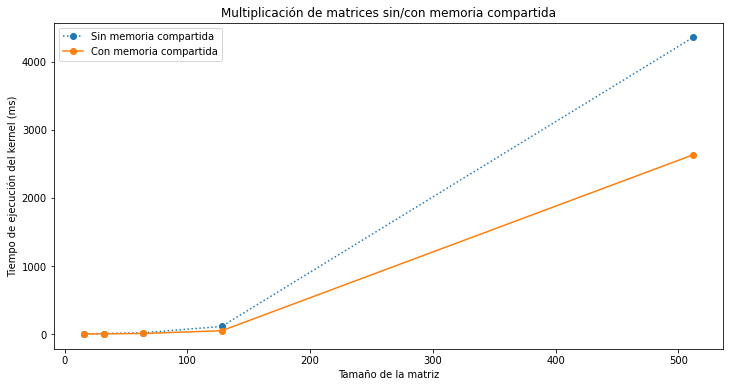

In [19]:
import matplotlib.pyplot as plt

size = [16, 32, 64, 128, 512]
time1 = [5.374, 8.948, 20.553, 114.010, 4354.8]
time2 = [3.011, 5.437, 10.539, 50.631, 2631.54]

plt.figure(figsize=(12,6))
plt.plot(size, time1, ":o", label="Sin memoria compartida")
plt.plot(size, time2, "-o", label="Con memoria compartida")
plt.title("Multiplicación de matrices sin/con memoria compartida")
plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución del kernel (ms)")
plt.legend()
plt.show()

Se observa que existen notables diferencias en tiempo de ejecución del kernel de utilizar memoria compartida a no utilizarla, sobre todo cuando los tamaños de matriz de incrementan considerablemente.

# MÁS: Revisión de los ejemplos instalados con CUDA

In [62]:
%cd /usr/local/cuda/samples
%ls

/usr/local/cuda-11.1/samples
0_Simple/     2_Graphics/  4_Finance/      6_Advanced/       bin/     EULA.txt
1_Utilities/  3_Imaging/   5_Simulations/  7_CUDALibraries/  common/  Makefile


In [63]:
%cd  0_Simple/matrixMul/
%ls


/usr/local/cuda-11.1/samples/0_Simple/matrixMul
Makefile  matrixMul.cu  NsightEclipse.xml  readme.txt


In [64]:
%pwd



'/usr/local/cuda-11.1/samples/0_Simple/matrixMul'

In [65]:
!cat matrixMul.cu



/**
 * Copyright 1993-2015 NVIDIA Corporation.  All rights reserved.
 *
 * Please refer to the NVIDIA end user license agreement (EULA) associated
 * with this source code for terms and conditions that govern your use of
 * this software. Any use, reproduction, disclosure, or distribution of
 * this software and related documentation outside the terms of the EULA
 * is strictly prohibited.
 *
 */

/**
 * Matrix multiplication: C = A * B.
 * Host code.
 *
 * This sample implements matrix multiplication which makes use of shared memory
 * to ensure data reuse, the matrix multiplication is done using tiling approach.
 * It has been written for clarity of exposition to illustrate various CUDA programming
 * principles, not with the goal of providing the most performant generic kernel for matrix multiplication.
 * See also:
 * V. Volkov and J. Demmel, "Benchmarking GPUs to tune dense linear algebra,"
 * in Proc. 2008 ACM/IEEE Conf. on Supercomputing (SC '08),
 * Piscataway, NJ: IEEE Press, 